<a href="https://colab.research.google.com/github/awanna3/NFL-Analysis/blob/main/Marlins_2023_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'pybaseball' already exists and is not an empty directory.
/content/pybaseball
Obtaining file:///content/pybaseball
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for pybaseball (pyproject.toml) ... done
  Created wheel for pybaseball: filename=pybaseball-2.2.7-0.editable-py3-none-any.whl size=8387 sha256=01ab987e2d5115f9cda42380d10346c1601810fa199e8ed25deae35e67f448b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-lt50yclu/wheels/75/aa/21/827a59167196855c4bc5d95f51714fb29b4fb579f469287380
Successfully built pybaseball
  Attempting uninstall: pybaseball
    Found existing installation: pybaseball 2.2.7
    Uninstalling pybaseball-2.2.7:
      Successfully uninstalled pybaseball-2.2.7
http://www.baseball-reference.com/teams/MIA/2023-schedule-scores.shtml


/content/pybaseball/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


AttributeError: module 'matplotlib.pyplot' has no attribute 'xtable'

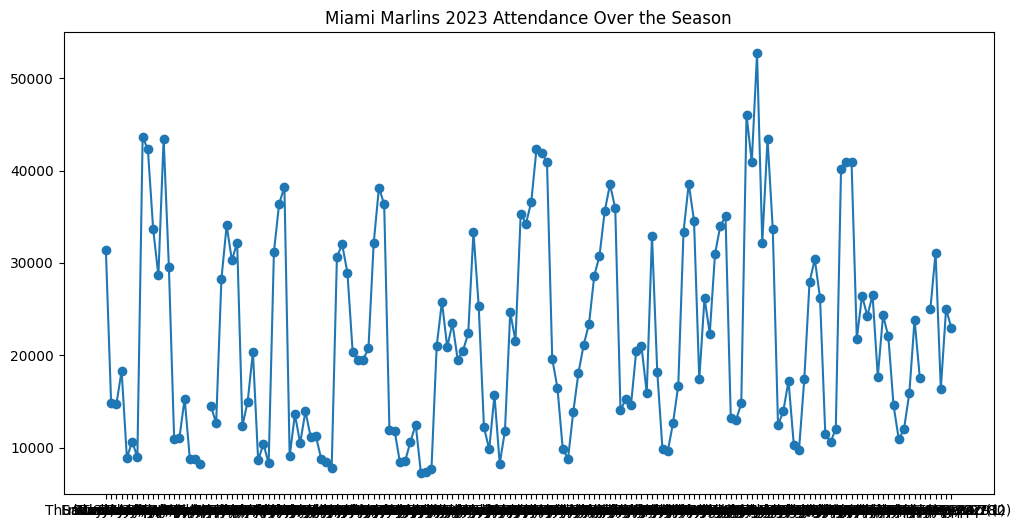

In [1]:
!git clone https://github.com/jldbc/pybaseball.git
%cd pybaseball
!pip install -e .

from pybaseball import schedule_and_record

http://www.baseball-reference.com/teams/MIA/2023-schedule-scores.shtml


/content/pybaseball/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


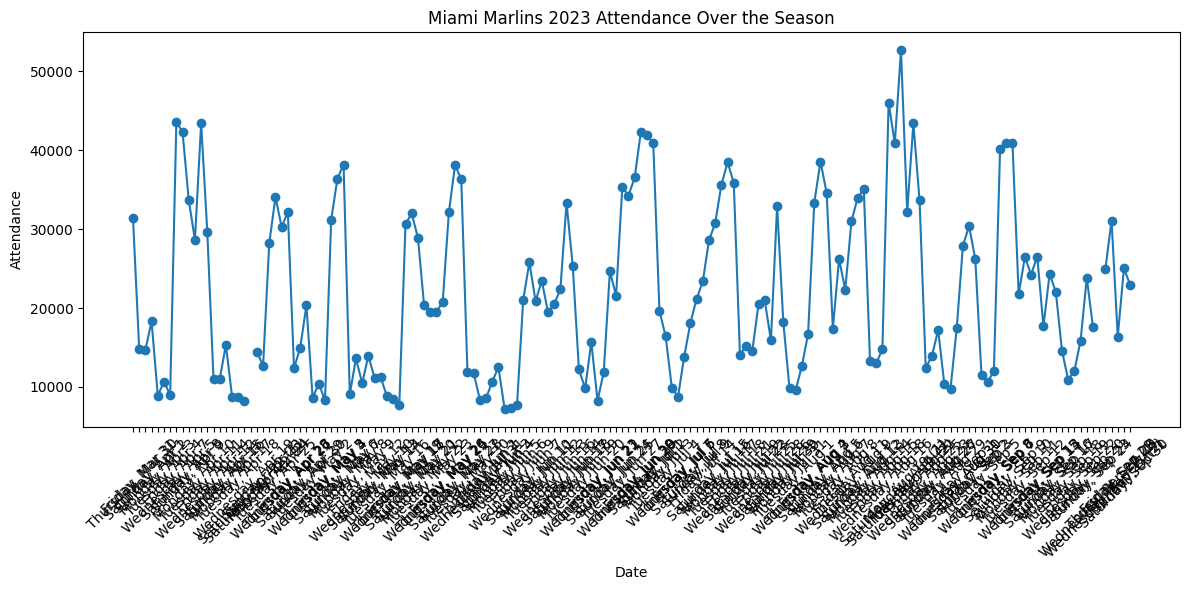

In [2]:
#Attendance Plot
mar2023 = schedule_and_record(2023, 'MIA')
mar2023.head()

mar_data = mar2023[['Date', 'Home_Away', 'Opp', 'R', 'RA', 'W/L', 'Attendance']]

mar_data.head()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(mar_data['Date'], mar_data['Attendance'], marker='o', linestyle='-')
plt.title('Miami Marlins 2023 Attendance Over the Season')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Runs Scored per Game: 4.16
Average Runs Allowed per Game: 4.49


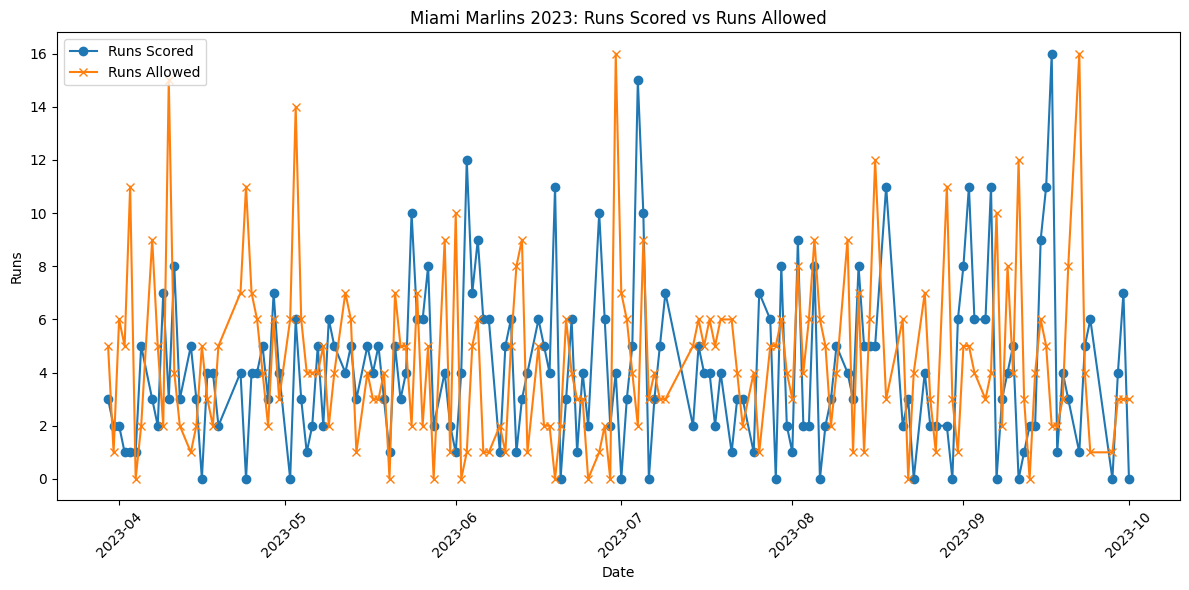

In [31]:
import pandas as pd
from pybaseball import schedule_and_record

mar_data = mar2023[['Date', 'R', 'RA']].copy()

mar_data['R'] = pd.to_numeric(mar_data['R'], errors='coerce')
mar_data['RA'] = pd.to_numeric(mar_data['RA'], errors='coerce')

mar_data = mar_data.dropna(subset=['R', 'RA'])

mar_data['Date'] = pd.to_datetime(mar_data['Date'], format='%A, %b %d', errors='coerce')
mar_data = mar_data.dropna(subset=['Date'])

mar_data['Date'] = mar_data['Date'].apply(lambda x: x.replace(year=2023))

avg_runs_scored = mar_data['R'].mean()
avg_runs_allowed = mar_data['RA'].mean()

print(f"Average Runs Scored per Game: {avg_runs_scored:.2f}")
print(f"Average Runs Allowed per Game: {avg_runs_allowed:.2f}")

plt.figure(figsize=(12,6))
plt.plot(mar_data['Date'], mar_data['R'], label='Runs Scored', marker='o')
plt.plot(mar_data['Date'], mar_data['RA'], label='Runs Allowed', marker='x')
plt.title('Miami Marlins 2023: Runs Scored vs Runs Allowed')
plt.xlabel('Date')
plt.ylabel('Runs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()